In [15]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score

import os

In [16]:
sns.__version__

'0.11.0'

## 1. EDA: 데이터 탐색

In [17]:
# 데이터 불러오기
df = pd.read_csv('./kakr-4th-competition/train.csv')
test = pd.read_csv('./kakr-4th-competition/test.csv')
sample_submission = pd.read_csv('./kakr-4th-competition/sample_submission.csv')

In [4]:
print(df.shape)
print(test.shape)
print(sample_submission.shape)

(26049, 16)
(6512, 15)
(6512, 2)


In [5]:
# .info: 결측치, 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [6]:
# sample 뽑기
df.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4920,4920,64,Self-emp-not-inc,170421,Some-college,10,Widowed,Craft-repair,Not-in-family,White,Female,0,0,8,United-States,<=50K
24397,24397,39,Private,80324,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,62,United-States,>50K
1696,1696,38,Private,85074,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
7671,7671,32,Private,101709,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
12335,12335,22,Private,183970,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K
2304,2304,20,State-gov,178517,Some-college,10,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
3984,3984,37,Private,201259,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
14030,14030,27,State-gov,280618,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
1281,1281,48,Private,107373,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
8950,8950,34,Private,141118,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [7]:
# .describe: 분포
df.describe(percentiles=[.9])

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
90%,23443.200000,58.000000,3.297330e+05,13.000000,0.00000,0.000000,55.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [8]:
# 대략적으로 어떤 값들이 있는지 확인
columns = df.columns
for i in range(1,len(columns)):
    print(columns[i],':',df[columns[i]].unique(),'\n')

age : [40 17 18 21 24 43 37 47 41 34 44 50 39 32 54 26 29 53 31 46 23 20 22 27
 51 57 25 76 38 66 64 58 45 52 67 65 35 19 68 28 33 36 63 62 42 59 49 30
 56 48 61 60 55 72 69 74 81 71 84 70 80 78 90 79 75 73 83 82 85 77 87 88
 86] 

workclass : ['Private' 'State-gov' '?' 'Self-emp-not-inc' 'Local-gov' 'Federal-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt : [168538 101626 353358 ... 238092 165694  99891] 

education : ['HS-grad' '9th' 'Some-college' 'Bachelors' '11th' '1st-4th' '5th-6th'
 'Assoc-acdm' '10th' 'Prof-school' '7th-8th' 'Masters' 'Assoc-voc'
 'Doctorate' '12th' 'Preschool'] 

education_num : [ 9  5 10 13  7  2  3 12  6 15  4 14 11 16  8  1] 

marital_status : ['Married-civ-spouse' 'Never-married' 'Separated' 'Married-spouse-absent'
 'Divorced' 'Widowed' 'Married-AF-spouse'] 

occupation : ['Sales' 'Machine-op-inspct' 'Other-service' 'Prof-specialty'
 'Adm-clerical' 'Craft-repair' '?' 'Handlers-cleaners' 'Farming-fishing'
 'Exec-managerial' 'Transport-moving' 'P

In [6]:
lst = ['workclass', 'education','marital_status', 'occupation', 'relationship',
       'race', 'sex', 'native_country','income']

In [10]:
# categorical: value_counts
for unit in lst:
    print('<',unit,'>')
    print(len(df[unit].value_counts())) # value가 몇 개씩 있는지 살펴볼 수 있다.
    print()

< workclass >
9

< education >
16

< marital_status >
7

< occupation >
15

< relationship >
6

< race >
5

< sex >
2

< native_country >
41

< income >
2



In [11]:
for unit in lst:
    print('<',unit,'>')
    print(len(df[unit].value_counts())) # value가 몇 개씩 있는지 살펴볼 수 있다.
    print()

< workclass >
9

< education >
16

< marital_status >
7

< occupation >
15

< relationship >
6

< race >
5

< sex >
2

< native_country >
41

< income >
2



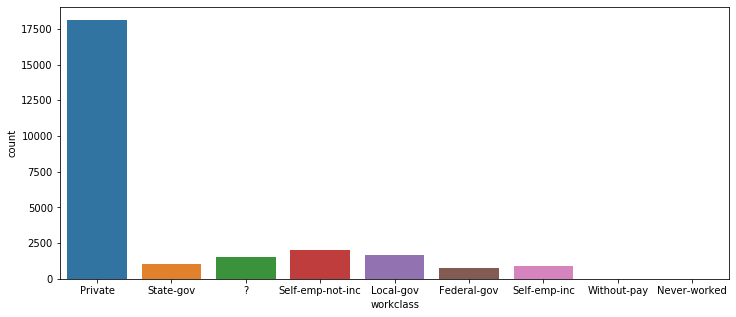

In [11]:
# 시각화1 - workclass 숫자
fig, ax = plt.subplots(1, 1, figsize=(12, 5)) # plot을 1 by 1으로, 크기는 12*5
sns.countplot(data=df, x='workclass', ax=ax)
plt.show()

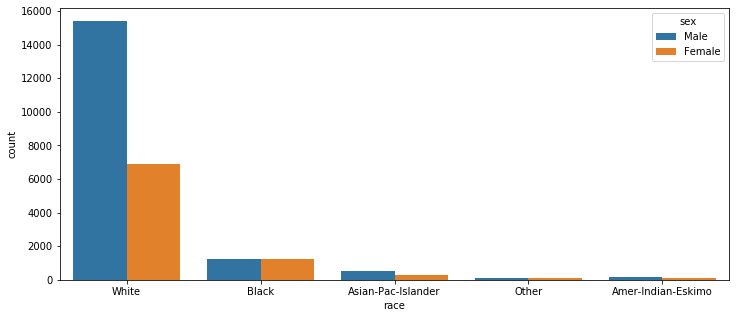

In [12]:
# 시각화2 - race 숫자 + 성별 구분
fig, ax = plt.subplots(1, 1, figsize=(12, 5)) # plot을 1 by 1으로, 크기는 12*5
sns.countplot(data=df, x='race', ax=ax, hue='sex') # hue: 색상의 기준
plt.show()

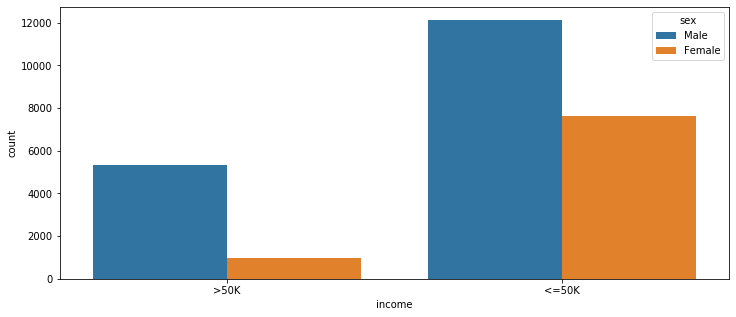

In [13]:
# 시각화3 - y값, 성별
fig, ax = plt.subplots(figsize=(12, 5)) # plot을 1 by 1으로, 크기는 12*5
sns.countplot(data=df, x='income', ax=ax, hue='sex') # hue: 색상의 기준
plt.show()

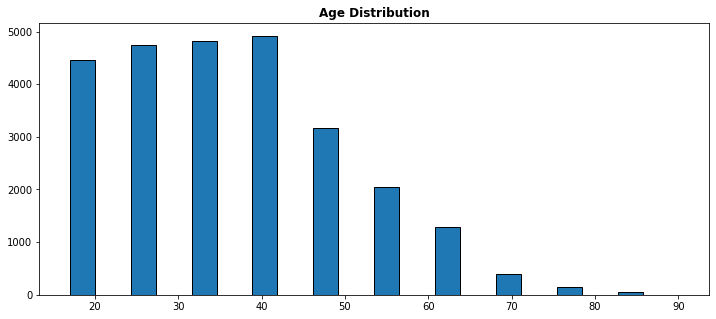

In [14]:
# 시각화4 - 나이 histogram
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.hist(df['age'], width=3, edgecolor='black')

ax.set_title('Age Distribution', fontweight='bold')
plt.show()

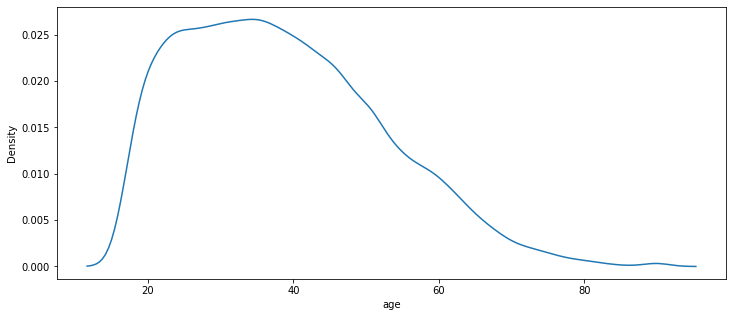

In [15]:
# 시각화5 - 나이 분포 -> kdeplot
fig,ax = plt.subplots(figsize=(12, 5))
sns.kdeplot(data=df, x='age')
plt.show()

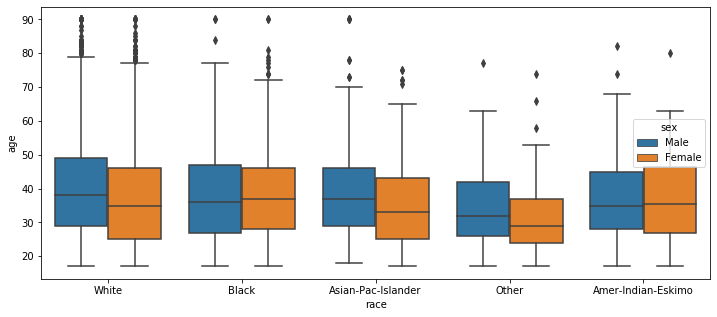

In [16]:
# 시각화6 - 인종 + 성별 -> boxplot
ig = plt.subplots(figsize = (12, 5))
sns.boxplot(data=df, x='race', y='age', hue='sex') # 인종에 따른 나이
plt.show()

In [17]:
# income: 1 or 0으로
df['income'] = (df['income'] == '>50K').astype(int)
# 이렇게도 가능
# df.income = df.income.map(lambda x: int(x=='>50K'))
## .map: Series(하나의 feature에 대해서만)에 쓸 수 있는 함수, 이 안의 데이터를 변형 (for문이 좀 느려서 추천)

In [18]:
# pivot table: groupby

df.groupby(['marital_status'])[['income']].mean().style.background_gradient(cmap='Purples')
# 백인 남성, Asian-Pac-Islander 남성 / 대체로 남성이 많이 버는 느낌

,income
marital_status,
Divorced,0.104921
Married-AF-spouse,0.526316
Married-civ-spouse,0.448789
Married-spouse-absent,0.080838
Never-married,0.046802
Separated,0.065375
Widowed,0.087940


In [19]:
# pivot table: 메소드

pd.pivot_table(df, columns='sex', index='race', values='income', aggfunc='mean')

sex,Female,Male
race,,
Amer-Indian-Eskimo,0.102273,0.120482
Asian-Pac-Islander,0.125926,0.341509
Black,0.051682,0.190135
Other,0.047059,0.117647
White,0.122085,0.317846


In [20]:
# 상관계수
df.corr().style.background_gradient()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
id,1.000000,0.007866,-0.001191,0.002309,0.007228,-0.002553,0.005749,0.004350
age,0.007866,1.000000,-0.076618,0.040107,0.077768,0.057875,0.066038,0.229292
fnlwgt,-0.001191,-0.076618,1.000000,-0.046377,0.000953,-0.008689,-0.020064,-0.007500
education_num,0.002309,0.040107,-0.046377,1.000000,0.119382,0.074813,0.146063,0.334582
capital_gain,0.007228,0.077768,0.000953,0.119382,1.000000,-0.032030,0.080543,0.225296
capital_loss,-0.002553,0.057875,-0.008689,0.074813,-0.032030,1.000000,0.054957,0.152537
hours_per_week,0.005749,0.066038,-0.020064,0.146063,0.080543,0.054957,1.000000,0.233726
income,0.004350,0.229292,-0.007500,0.334582,0.225296,0.152537,0.233726,1.000000


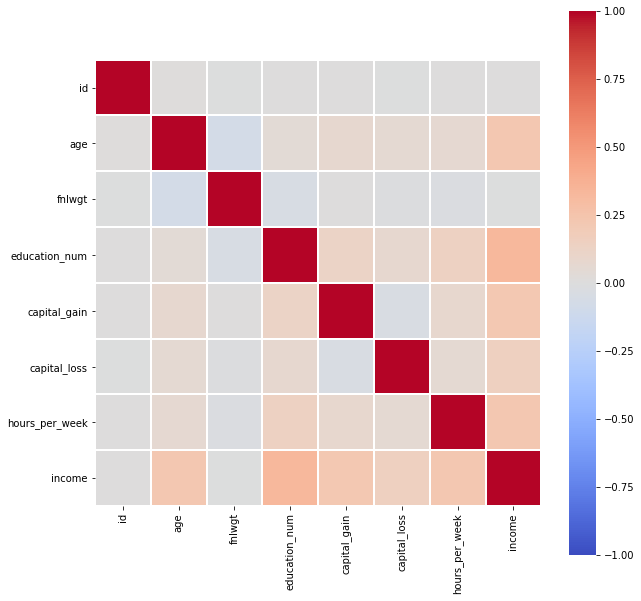

In [21]:
# 상관계수 - heatmap
corr = df.corr() # 상관계수

fig = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, square=True, linecolor='white', linewidth=1, cmap='coolwarm',
            vmax=1.0, vmin=-1.0)
plt.show()

# 남들도 가독성 높게 볼 수 있도록!

In [22]:
# loc(column명), iloc(숫자): 데이터를 찾아가는 것
df.capital_gain == 99999
# 조건문 -> 결과: 맞는지 틀린지 -> 골라라
df.loc[df.capital_gain < 99999, :] 

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,0


In [23]:
df.loc[df.race == 'White', :]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
6,6,43,State-gov,206139,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,26042,48,Self-emp-not-inc,191389,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,50,United-States,0
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0


In [24]:
# .apply: 여러 축에 대해서 가능
df.apply(lambda x: x['age'] + x['hours_per_week'], axis = 1)
# axis: 축

0        100
1         37
2         34
3         46
4         44
        ... 
26044    109
26045     63
26046     93
26047     66
26048     50
Length: 26049, dtype: int64

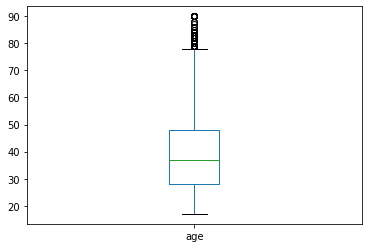

In [25]:
# 간단한 boxplot
df.age.plot(kind='box') # 간단하게 가능함

In [26]:
# 결측치? - '?'을 어떻게 해야하나
df.apply(lambda x: '?' in list(x), axis=1)
# 물음표가 들어있어?

0        False
1        False
2        False
3        False
4         True
         ...  
26044    False
26045    False
26046     True
26047    False
26048     True
Length: 26049, dtype: bool

In [27]:
# 결측치 확인
df[df.apply(lambda x: '?' in list(x), axis=1)]
# 여러줄 확인이니까

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,0
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,0
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,0
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,0
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,0
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0


In [28]:
df.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [29]:
df.occupation.value_counts()

Prof-specialty       3304
Craft-repair         3262
Exec-managerial      3246
Sales                2998
Adm-clerical         2983
Other-service        2626
Machine-op-inspct    1582
?                    1508
Transport-moving     1270
Handlers-cleaners    1092
Farming-fishing       784
Tech-support          742
Protective-serv       522
Priv-house-serv       123
Armed-Forces            7
Name: occupation, dtype: int64

In [30]:
df.loc[(df.workclass == '?') & (df.occupation == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,0
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,0
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,0
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,0
67,67,65,?,404601,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,2414,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,0
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,0
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0


In [31]:
df.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Guatemala                        52
Columbia                         52
Vietnam                          50
Italy                            50
Dominican-Republic               48
Japan                            47
Poland                           47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Peru                             26
Greece                      

In [32]:
# capital_gain 순서로 정렬
df.loc[df.capital_gain < 99999].sort_values('capital_gain',ascending=False)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13280,13280,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,0
12625,12625,19,Private,188815,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,20,United-States,0
2893,2893,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
17707,17707,20,?,273701,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,0
4703,4703,55,Self-emp-not-inc,145574,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,60,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,9047,48,Private,180446,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,0
9046,9046,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
9045,9045,36,Self-emp-not-inc,34180,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,1
9044,9044,23,?,283806,9th,5,Divorced,?,Not-in-family,White,Female,0,0,35,United-States,0


In [33]:
# log 표현
# df['log_capital_gain'] = df.capital_gain.map(lambda x: np.log(x, where=(x!=0)))

## 2. 데이터 변형

In [34]:
df.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

In [35]:
# df -> X, y
X = df.drop(['income'], axis=1, inplace=False)
y = df['income']

In [36]:
print(X.shape)
print(y.shape)

(26049, 14)
(26049,)


In [37]:
# X, y -> X_train, X_val, y_train, y_val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_test = test

In [39]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)

(20839, 14)
(5210, 14)
(20839,)
(5210,)
(6512, 14)


In [40]:
# 1) education, relationship, native_country 제거
X_train.drop(['education','relationship','native_country'], axis=1, inplace=True)
X_val.drop(['education','relationship','native_country'], axis=1, inplace=True)
X_test.drop(['education','relationship','native_country'], axis=1, inplace=True)

In [41]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)

(20839, 11)
(5210, 11)
(20839,)
(5210,)
(6512, 11)


In [42]:
# 2) marital_status 조정
X_train['marital_status'] = (X_train['marital_status'] == 'Married-civ-spouse').astype(int)
X_val['marital_status'] = (X_val['marital_status'] == 'Married-civ-spouse').astype(int)
X_test['marital_status'] = (X_test['marital_status'] == 'Married-civ-spouse').astype(int)

In [43]:
# 3) Onehot encoding
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

In [44]:
# 4) MinMax Scaler? Standard Scaler
'''
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
'''

'\nmm_scaler = MinMaxScaler()\nst_scaler = StandardScaler()\n'

In [45]:
# Scaling할 것들: age, fnlwgt, education_num, hours_per_week, capital_gain, capital_loss
'''
s_columns = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

for column in s_columns:
    X_train[column] = st_scaler.fit_transform(X_train['fnlwgt'].values.reshape(-1,1))
    X_test[column] = st_scaler.transform(X_test['fnlwgt'].values.reshape(-1,1))
    '''

"\ns_columns = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']\n\nfor column in s_columns:\n    X_train[column] = st_scaler.fit_transform(X_train['fnlwgt'].values.reshape(-1,1))\n    X_test[column] = st_scaler.transform(X_test['fnlwgt'].values.reshape(-1,1))\n    "

## 3. 모델링

In [46]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_val_predict = dt_clf.predict(X_val).astype(int)

In [48]:
f1_score(y_val, y_val_predict, average='micro')

0.809021113243762

In [49]:
sample_submission['prediction'] = dt_clf.predict(X_test).astype(int)
sample_submission.to_csv('submission2.csv', index=False)

## 4. 결과
1. 기본 line + DT : 0.79765
2. 기본 line + MinMax Scaling + DT : 0.74661

## 5. 해야할 것
1. Validation (그냥, Cross, K-Fold)
2. Feature Engineering
    - Encoding 방법
    - Feature 줄이기 (Selection, PCA)
    - Feature 만들기: 어떤 insight로?
3. Modeling
    - DT의 경우 Scaler 어떤 걸 써도 그닥, 별로 안 좋아보임

In [13]:
import math

In [14]:
math.exp(10)

22026.465794806718